# Dry Beans Classification

# Install required libraries

In [1]:
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install scikit-learn
!pip install scipy
!pip install os
!pip install autoviz
!pip install sweetviz
!pip install plotly
!pip install tensorflow
!pip install lime

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at 

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at 

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


# Import libraries

In [2]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.backends.backend_tkagg
matplotlib.use('tkagg')
%matplotlib inline
import seaborn as sns
import warnings

from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE


# Exploratory Data Analysis

Get Current Working Directory

In [3]:
os.getcwd()

'/Users/vijayasrichevugani/Desktop/Python ML Assignment/Project assignment'

Load the training and testing datasets

In [4]:
train_data = pd.read_csv("/Users/vijayasrichevugani/Desktop/Python ML Assignment/Project assignment/dry_bean_classification_train.csv")
test_data = pd.read_csv("/Users/vijayasrichevugani/Desktop/Python ML Assignment/Project assignment/dry_bean_classification_test.csv")

Read the training data

In [5]:
train_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,42339,741.226,260.199330,207.306394,1.255144,0.604347,42676,232.180294,0.771202,0.992103,0.968387,0.892317,0.006146,0.002403,0.796230,0.999383,SEKER
1,68247,1088.754,370.368146,237.863792,1.557060,0.766507,70172,294.779204,0.767683,0.972567,0.723492,0.795909,0.005427,0.001343,0.633471,0.986352,BARBUNYA
2,37856,708.716,248.430330,194.360324,1.278195,0.622835,38232,219.544429,0.744640,0.990165,0.947109,0.883726,0.006563,0.002469,0.780972,0.998235,SEKER
3,33143,648.385,222.526309,189.737379,1.172812,0.522480,33377,205.423899,0.769980,0.992989,0.990685,0.923144,0.006714,0.003008,0.852195,0.999465,SEKER
4,29925,647.570,237.714031,161.004849,1.476440,0.735703,30321,195.196551,0.785309,0.986940,0.896748,0.821140,0.007944,0.002228,0.674271,0.995521,DERMASON


Shape of data 

In [6]:
train_data.shape

(10889, 17)

Find the complete info of training data

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10889 non-null  int64  
 1   Perimeter        10889 non-null  float64
 2   MajorAxisLength  10889 non-null  float64
 3   MinorAxisLength  10889 non-null  float64
 4   AspectRation     10889 non-null  float64
 5   Eccentricity     10889 non-null  float64
 6   ConvexArea       10889 non-null  int64  
 7   EquivDiameter    10889 non-null  float64
 8   Extent           10889 non-null  float64
 9   Solidity         10889 non-null  float64
 10  roundness        10889 non-null  float64
 11  Compactness      10889 non-null  float64
 12  ShapeFactor1     10889 non-null  float64
 13  ShapeFactor2     10889 non-null  float64
 14  ShapeFactor3     10889 non-null  float64
 15  ShapeFactor4     10889 non-null  float64
 16  Class            10889 non-null  object 
dtypes: float64(1

Find for null values in any fields

In [8]:
train_data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Find number of duplicate values in data

In [9]:
train_data.duplicated(subset=None, keep='first').sum()

47

Drop duplicate values 

In [10]:
train_data = train_data.drop_duplicates()

Statistical Summary of data 

In [11]:
train_data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000
mean,53041.142409,854.901120,319.738898,202.469274,1.579670,0.749693,53761.103486,253.036866,0.749837,0.987148,0.873808,0.800728,0.006558,0.001721,0.644955,0.995086
std,29365.009184,214.312325,85.624843,45.043039,0.245358,0.092391,29820.210911,59.217802,0.048608,0.004608,0.059276,0.061564,0.001129,0.000596,0.098870,0.004299
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.944568,0.489618,0.640577,0.002856,0.000564,0.410339,0.955032
25%,36287.500000,703.326250,253.221513,175.986506,1.429171,0.714431,36678.000000,214.948087,0.718871,0.985634,0.833776,0.763638,0.005878,0.001161,0.583142,0.993724
50%,44610.500000,794.321500,296.495400,192.684832,1.549192,0.763762,45139.000000,238.327197,0.759793,0.988288,0.883619,0.801745,0.006636,0.001700,0.642795,0.996399
75%,61450.250000,976.518750,375.871738,217.588621,1.702020,0.809197,62401.500000,279.715728,0.786444,0.990017,0.916971,0.834791,0.007267,0.002173,0.696876,0.997894
max,254616.000000,1985.370000,738.860154,450.926187,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003573,0.974767,0.999733


Notes from the training dataset:

The dataset has 10889 rows and after removing 47 duplicates the dataset has 10842 rows and 17 columns
All columns are numerical except "Class" column which will be our target
There are no NULL values in the data thanks to which we have less work to do
By looking at the description of the data we can come to the conclusion that our data will need standardization

Find the different types of values in the 'class' field

In [12]:
train_data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'DERMASON', 'CALI', 'BOMBAY', 'SIRA', 'HOROZ'],
      dtype=object)

Find total values for each class type

In [13]:
train_data['Class'].value_counts()

DERMASON    2815
SIRA        2123
SEKER       1631
HOROZ       1475
CALI        1316
BARBUNYA    1068
BOMBAY       414
Name: Class, dtype: int64

There is 7 unique types of beans in "Class" Column
BOMBAY occurs the least amount of times in dataset
DERMASON most often appears in our dataset

# Class Column Visualization
1- Count and distribution of all beans categories:

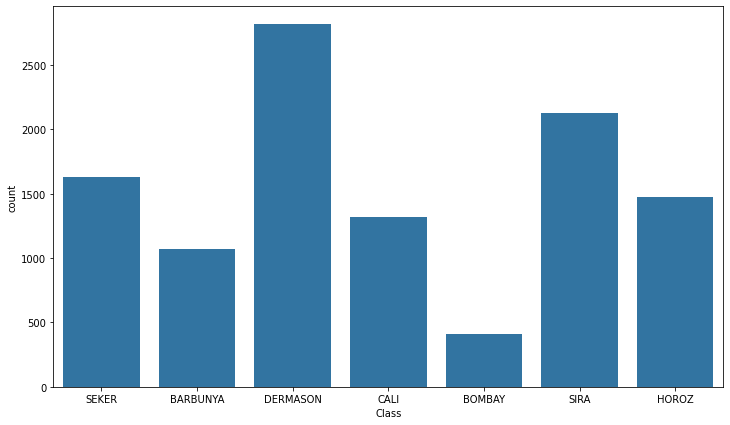

In [14]:
plt.figure(figsize=(12,7))
sns.countplot(x='Class', data=train_data)
plt.show()

We can notice that there is a slight imbalance in the data we need to handle.

2- Distribution of numerical features:

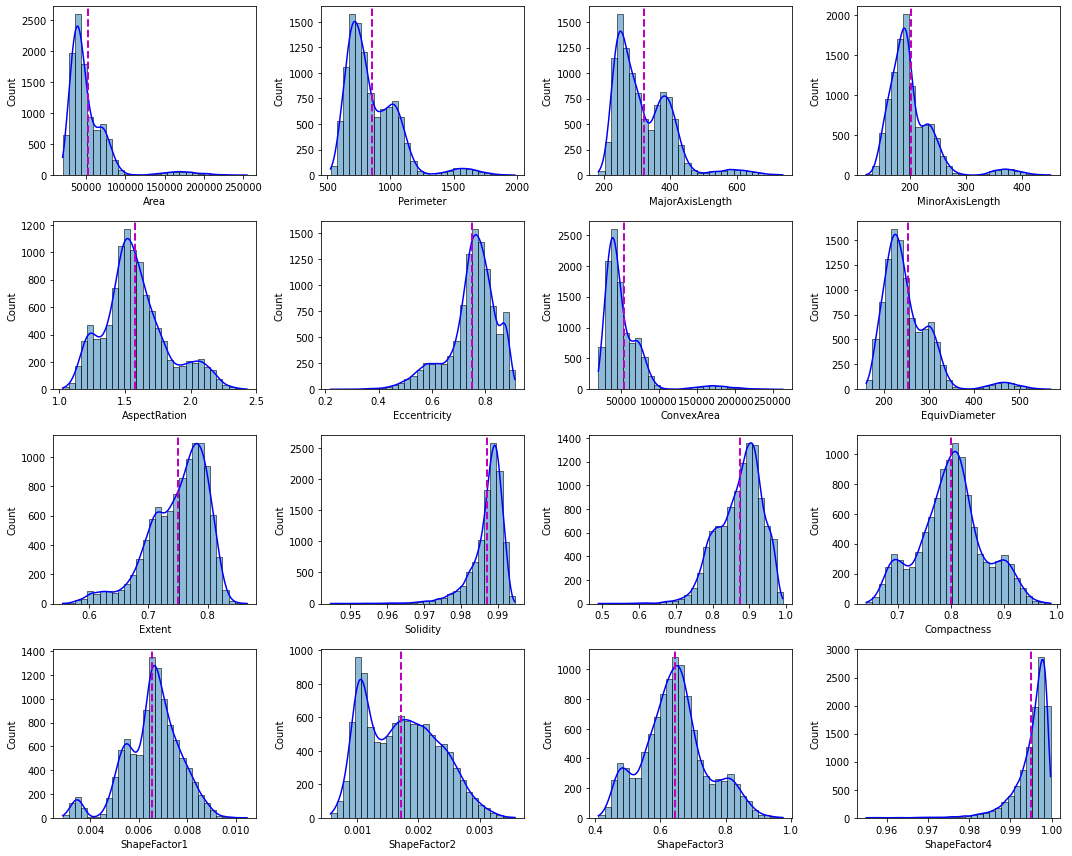

In [15]:
Numeric_cols = train_data.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(train_data[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('Blue')
    g.axvline(x=train_data[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

Some distributions have long tails and most are bi-modal which means that some bean classes should be quite distinct from others.

# Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

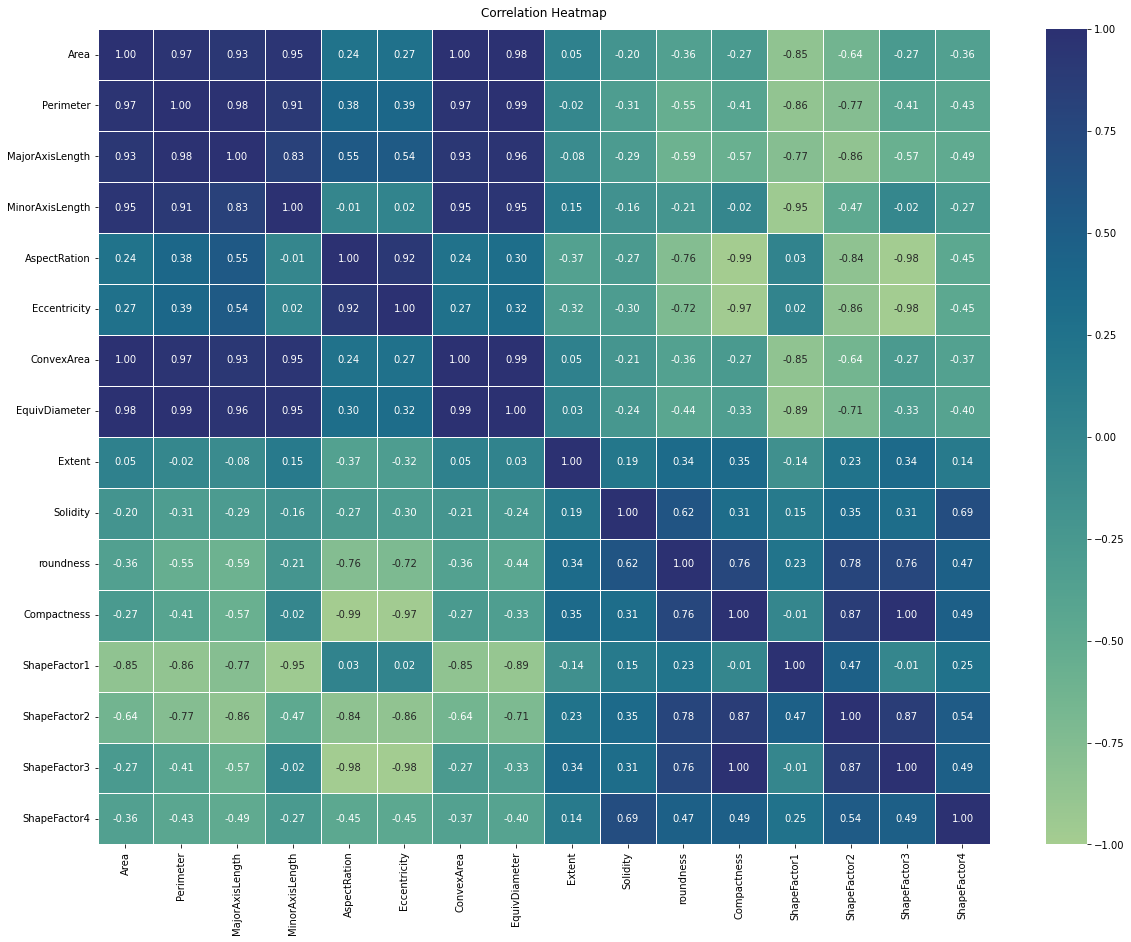

In [16]:
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(train_data.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Points noted from Correlation map:

Area: Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter
Perimeter: Area, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter
MajorAxisLength: Area, Perimeter, MinorAxisLength, ConvexArea, EquivDiameter
MinorAxisLength: Area, Perimeter, MajorAxisLength, ConvexArea, EquivDiameter
ConvexArea: Area, Perimeter, MajorAxisLength, MinorAxisLength, EquivDiameter
EquivDiameter: Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea

# Attributes Histogram

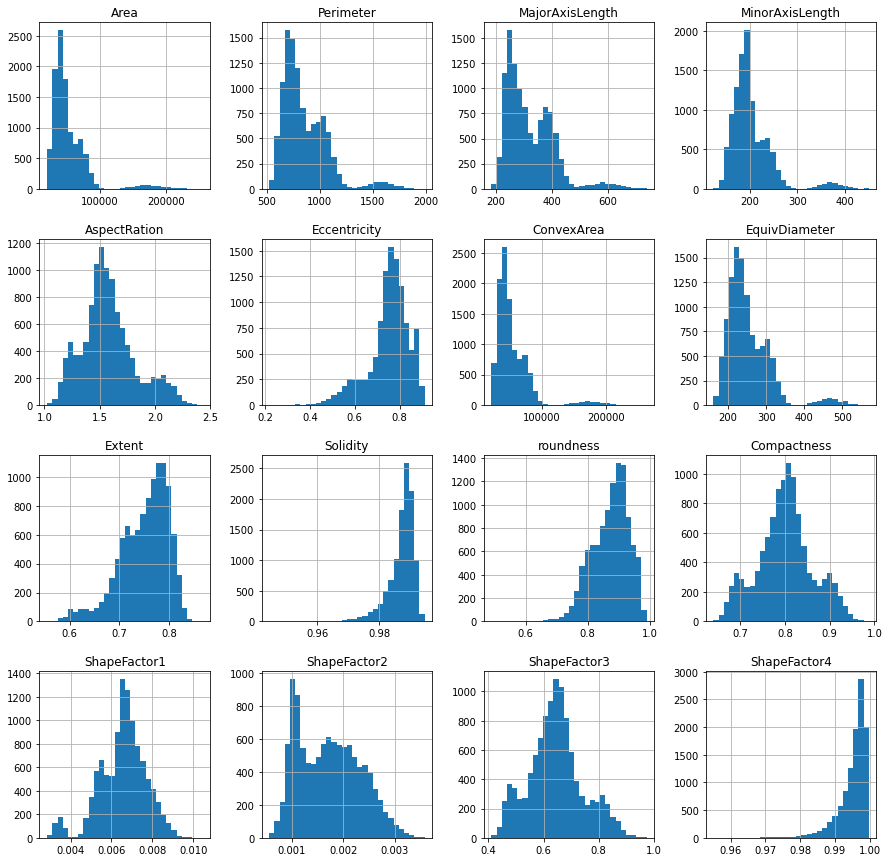

In [17]:
train_data.hist(bins=30, figsize=(15,15))
plt.show()

Removing outliers

In [18]:
# train_data = train_data[train_data['Eccentricity'] >= 0.25]
# train_data = train_data[train_data['Solidity'] >= 0.94]
# train_data = train_data[train_data['roundness'] >= 0.53]
# train_data = train_data[train_data['ShapeFactor4'] >= 0.96]

box plot for outliers 
beyond boxplot - outlier 

# Feature Engineering

Label Encoding

"Class" column is str so we need to convert the labels into a numeric form.

In [19]:
labelencoder = LabelEncoder()
train_data["Class"] = labelencoder.fit_transform(train_data['Class'])

train_data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,42339,741.226,260.199330,207.306394,1.255144,0.604347,42676,232.180294,0.771202,0.992103,0.968387,0.892317,0.006146,0.002403,0.796230,0.999383,5
1,68247,1088.754,370.368146,237.863792,1.557060,0.766507,70172,294.779204,0.767683,0.972567,0.723492,0.795909,0.005427,0.001343,0.633471,0.986352,0
2,37856,708.716,248.430330,194.360324,1.278195,0.622835,38232,219.544429,0.744640,0.990165,0.947109,0.883726,0.006563,0.002469,0.780972,0.998235,5
3,33143,648.385,222.526309,189.737379,1.172812,0.522480,33377,205.423899,0.769980,0.992989,0.990685,0.923144,0.006714,0.003008,0.852195,0.999465,5
4,29925,647.570,237.714031,161.004849,1.476440,0.735703,30321,195.196551,0.785309,0.986940,0.896748,0.821140,0.007944,0.002228,0.674271,0.995521,3
5,38489,707.978,244.119399,200.950084,1.214826,0.567805,38782,221.372349,0.788871,0.992445,0.964955,0.906820,0.006343,0.002646,0.822322,0.998979,5
6,89592,1155.357,452.291405,254.964533,1.773939,0.825968,90627,337.745581,0.795772,0.988580,0.843425,0.746743,0.005048,0.000968,0.557626,0.989193,2
7,42379,759.965,251.037567,215.217912,1.166434,0.514795,42840,232.289945,0.763586,0.989239,0.922090,0.925319,0.005924,0.002679,0.856216,0.998720,5
8,203536,1735.247,648.157318,401.698875,1.613540,0.784795,206049,509.067858,0.774879,0.987804,0.849432,0.785408,0.003184,0.000747,0.616866,0.995337,1
9,27306,608.784,225.492411,154.595717,1.458594,0.727986,27648,186.459323,0.801491,0.987630,0.925852,0.826898,0.008258,0.002382,0.683761,0.997330,3


Label Encoding for 'Class' in test data 

In [20]:
test_data["Class"] = labelencoder.fit_transform(test_data['Class'])
test_data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
1,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
2,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,5
3,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,5
4,31091,638.558,210.486255,188.326848,1.117665,0.446622,31458,198.963039,0.786377,0.988334,0.958173,0.945254,0.006770,0.003334,0.893506,0.998640,5
5,31158,642.626,216.484836,183.644312,1.178827,0.529514,31492,199.177302,0.798759,0.989394,0.948119,0.920052,0.006948,0.003071,0.846496,0.997872,5
6,31202,644.454,215.640695,184.471684,1.168964,0.517871,31573,199.317888,0.779193,0.988249,0.944079,0.924306,0.006911,0.003112,0.854341,0.998693,5
7,31530,638.857,213.785654,188.066482,1.136756,0.475536,31791,200.362778,0.768949,0.991790,0.970793,0.937213,0.006780,0.003227,0.878369,0.998491,5
8,32026,654.237,230.979067,176.931808,1.305469,0.642831,32349,201.932587,0.779449,0.990015,0.940248,0.874246,0.007212,0.002599,0.764307,0.997779,5
9,32338,653.602,221.411341,186.136273,1.189512,0.541531,32672,202.913825,0.782491,0.989777,0.951254,0.916456,0.006847,0.002979,0.839892,0.999062,5


Split the X_train, y_train and X_test, y_test

In [21]:
X_train = train_data.drop(columns='Class')
y_train = train_data['Class']

X_test = test_data.drop(columns=['Class'])  # Drop the target column to get features
y_test = test_data['Class']  # Extract the target column

Print the top 5 rows of X_train

In [22]:
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,42339,741.226,260.199330,207.306394,1.255144,0.604347,42676,232.180294,0.771202,0.992103,0.968387,0.892317,0.006146,0.002403,0.796230,0.999383
1,68247,1088.754,370.368146,237.863792,1.557060,0.766507,70172,294.779204,0.767683,0.972567,0.723492,0.795909,0.005427,0.001343,0.633471,0.986352
2,37856,708.716,248.430330,194.360324,1.278195,0.622835,38232,219.544429,0.744640,0.990165,0.947109,0.883726,0.006563,0.002469,0.780972,0.998235
3,33143,648.385,222.526309,189.737379,1.172812,0.522480,33377,205.423899,0.769980,0.992989,0.990685,0.923144,0.006714,0.003008,0.852195,0.999465
4,29925,647.570,237.714031,161.004849,1.476440,0.735703,30321,195.196551,0.785309,0.986940,0.896748,0.821140,0.007944,0.002228,0.674271,0.995521


Print top 5 rows in y_train

In [23]:
y_train.head()

0    5
1    0
2    5
3    5
4    3
Name: Class, dtype: int64

# Calculating Feature Importance

In [24]:
X_test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
1,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
2,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236
3,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061
4,31091,638.558,210.486255,188.326848,1.117665,0.446622,31458,198.963039,0.786377,0.988334,0.958173,0.945254,0.006770,0.003334,0.893506,0.998640


In [25]:
y_test.head()

0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int64

In [26]:
# import numpy as np

# # Train your model
# model = ExtraTreesClassifier(n_estimators=500, random_state=42)
# model.fit(X_train, y_train)

# # Compute feature importances
# feat_importances = model.feature_importances_

# # Compute variance of feature importances
# importance_variance = np.var(feat_importances)

# print("Variance of feature importances:", importance_variance)


In [27]:
# # Train your model
# model = ExtraTreesClassifier(n_estimators=500, random_state=42)
# model.fit(X_train,y_train)
# print(model.feature_importances_)

# # Compute feature importances
# feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# # Plot the top 10 feature importances
# plt.figure(figsize=(10, 6))
# feat_importances.nlargest(10).plot(kind='barh')
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.title('Top 10 Feature Importances')
# plt.show()

# Standarizing Features

In [28]:
scaler_X = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

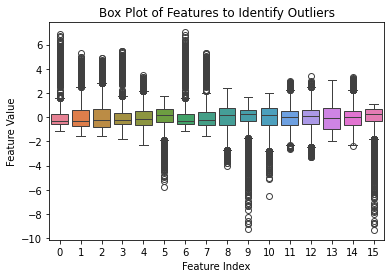

In [29]:
# Assuming X_train_scaled is your data containing features
# You might want to transpose it if it's in the form of rows being features and columns being samples

sns.boxplot(data=X_train_scaled)
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.title('Box Plot of Features to Identify Outliers')
plt.show()

# Model Training using Random Forest Classification

For classification purposes, I chose the: Random Forest Classifier Model

In [30]:
forest = RandomForestClassifier(n_estimators=10, 
                                random_state=42, 
                                max_depth=8, 
                                max_features=5, 
                                min_samples_leaf=5)

forest.fit(X_train_scaled, y_train)
y_pred_rf = forest.predict(X_test_scaled)

# Classification Report and Accuracy Score

In [31]:
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred_rf))

y_test_labels_rf = y_test.unique()
decoded_y_test_labels_rf = labelencoder.inverse_transform(y_test_labels_rf)

print(classification_report(y_test, y_pred_rf, target_names=np.unique(decoded_y_test_labels_rf)))

Accuracy: 0.91697
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.84      0.89       254
      BOMBAY       1.00      1.00      1.00       108
        CALI       0.90      0.96      0.93       314
    DERMASON       0.91      0.92      0.91       731
       HOROZ       0.96      0.97      0.96       406
       SEKER       0.97      0.93      0.95       396
        SIRA       0.84      0.87      0.85       513

    accuracy                           0.92      2722
   macro avg       0.93      0.92      0.93      2722
weighted avg       0.92      0.92      0.92      2722



High precision & High recall are the ones to lookout for 
F1-score -> better model


# Classification Visualization Using ConfusionMatrixDisplay

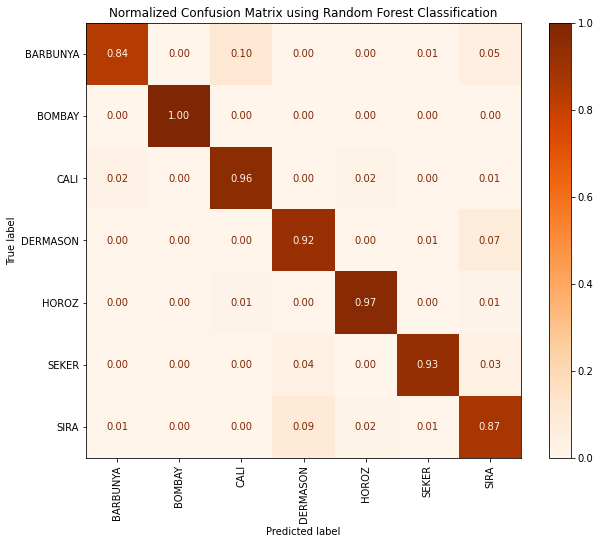

In [32]:
# Generate predictions using your forest estimator
y_pred_rf = forest.predict(X_test_scaled)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, normalize='true')  # You can change 'normalize' to None if you want the non-normalized matrix

# Display confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                              display_labels=np.unique(decoded_y_test_labels_rf))
fig, ax = plt.subplots(figsize=(10, 8))
disp_rf.plot(ax=ax, cmap=plt.cm.Oranges, xticks_rotation='vertical', values_format='.2f')
plt.title("Normalized Confusion Matrix using Random Forest Classification")
plt.show()


In [33]:
mse = mean_squared_error(y_test, y_pred_rf)
r_squared = r2_score(y_test, y_pred_rf)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.7167523879500367
r_square_value : 0.7800923942702682


In [34]:
# Calculate F1 scores
macro_f1 = f1_score(y_test, y_pred_rf, average='macro')
micro_f1 = f1_score(y_test, y_pred_rf, average='micro')

print('Macro F1 Score for Random Forest Classification:', macro_f1)
print('Micro F1 Score for Random Forest Classification:', micro_f1)

Macro F1 Score for Random Forest Classification: 0.9275527916797418
Micro F1 Score for Random Forest Classification: 0.916972814107274


# Model Training using Support Vector Machine 

In [35]:
# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test_scaled)

In [36]:
# Calculate and print the accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy: %.5f' % accuracy_svm)

# Decode labels
y_test_labels_svm = y_test.unique()
decoded_y_test_labels_svm = labelencoder.inverse_transform(y_test_labels_svm)

# Print the classification report
print(classification_report(y_test, y_pred_svm, target_names=np.unique(decoded_y_test_labels_svm)))

Accuracy: 0.92983
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.90      0.93       254
      BOMBAY       1.00      1.00      1.00       108
        CALI       0.95      0.96      0.96       314
    DERMASON       0.92      0.91      0.92       731
       HOROZ       0.97      0.98      0.97       406
       SEKER       0.96      0.94      0.95       396
        SIRA       0.85      0.88      0.86       513

    accuracy                           0.93      2722
   macro avg       0.95      0.94      0.94      2722
weighted avg       0.93      0.93      0.93      2722



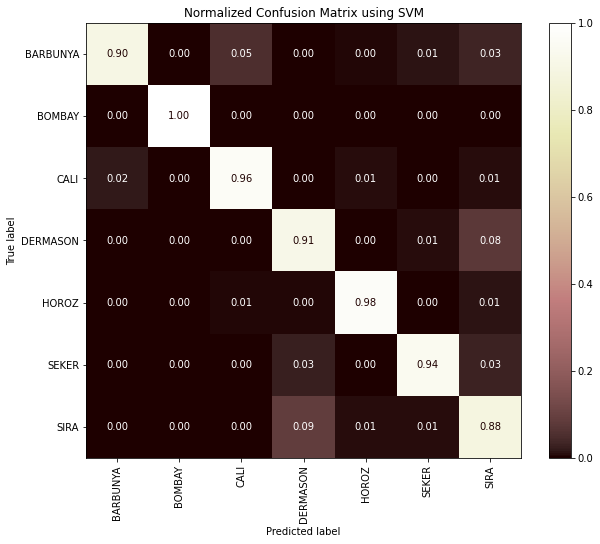

In [37]:
# Generate predictions using your SVM classifier
y_pred_svm = svm.predict(X_test_scaled)

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, normalize='true')  # You can change 'normalize' to None if you want the non-normalized matrix

# Display confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=np.unique(decoded_y_test_labels_svm))
fig, ax = plt.subplots(figsize=(10, 8))
disp_svm.plot(ax=ax, cmap=plt.cm.pink, xticks_rotation='vertical', values_format='.2f')
plt.title("Normalized Confusion Matrix using SVM")
plt.show()

In [38]:
mse = mean_squared_error(y_test, y_pred_svm)
r_squared = r2_score(y_test, y_pred_svm)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.6043350477590007
r_square_value : 0.814583284764014


In [39]:
# Calculate F1 scores
macro_f1 = f1_score(y_test, y_pred_svm, average='macro')
micro_f1 = f1_score(y_test, y_pred_svm, average='micro')

print('Macro F1 Score for SVM:', macro_f1)
print('Micro F1 Score for SVM:', micro_f1)

Macro F1 Score for SVM: 0.9426928228709839
Micro F1 Score for SVM: 0.9298310066127847


# Model Training using Decision Tree Classifier

In [40]:
# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
decision_tree.fit(X_train_scaled, y_train)

# Make predictions using the Decision Tree classifier
y_pred_decision_tree = decision_tree.predict(X_test_scaled)

In [41]:
# Calculate and print the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_decision_tree)
print('Accuracy: %.5f' % accuracy_dt)

# Decode labels
y_test_labels_dt = y_test.unique()
decoded_y_test_labels_dt = labelencoder.inverse_transform(y_test_labels_dt)

# Print the classification report
print(classification_report(y_test, y_pred_decision_tree, target_names=np.unique(decoded_y_test_labels_dt)))

Accuracy: 0.89713
              precision    recall  f1-score   support

    BARBUNYA       0.90      0.87      0.89       254
      BOMBAY       1.00      1.00      1.00       108
        CALI       0.92      0.93      0.93       314
    DERMASON       0.91      0.88      0.89       731
       HOROZ       0.92      0.95      0.93       406
       SEKER       0.92      0.92      0.92       396
        SIRA       0.81      0.84      0.82       513

    accuracy                           0.90      2722
   macro avg       0.91      0.91      0.91      2722
weighted avg       0.90      0.90      0.90      2722



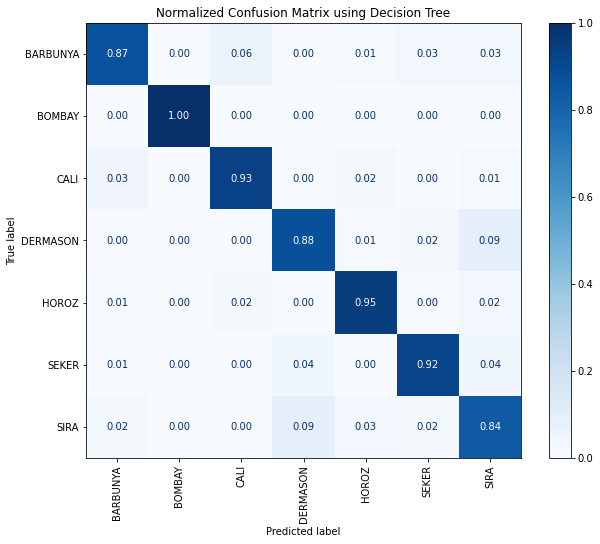

In [42]:
# Compute confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_decision_tree, normalize='true')  # You can change 'normalize' to None if you want the non-normalized matrix

# Display confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt,
                              display_labels=np.unique(decoded_y_test_labels_dt))
fig, ax = plt.subplots(figsize=(10, 8))
disp_dt.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='.2f')
plt.title("Normalized Confusion Matrix using Decision Tree")
plt.show()


In [43]:
mse = mean_squared_error(y_test, y_pred_decision_tree)
r_squared = r2_score(y_test, y_pred_decision_tree)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.8978692138133725
r_square_value : 0.7245237373636779


In [44]:
# Calculate F1 scores
macro_f1 = f1_score(y_test, y_pred_decision_tree, average='macro')
micro_f1 = f1_score(y_test, y_pred_decision_tree, average='micro')

print('Macro F1 Score for Decision Tree:', macro_f1)
print('Micro F1 Score for Decision Tree:', micro_f1)

Macro F1 Score for Decision Tree: 0.9117450798051517
Micro F1 Score for Decision Tree: 0.8971344599559148


# Model Training using XG Boost

In [45]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the XGBoost classifier
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions using the XGBoost classifier
y_pred_xgb = xgb_classifier.predict(X_test_scaled)


In [46]:
# Calculate and print the accuracy score for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print('Accuracy: %.5f' % accuracy_xgb)

# Decode labels
decoded_y_test_labels_xgb = labelencoder.inverse_transform(np.unique(y_test))

# Print the classification report for XGBoost
print(classification_report(y_test, y_pred_xgb, target_names=decoded_y_test_labels_xgb))


Accuracy: 0.92469
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.91      0.94       254
      BOMBAY       1.00      1.00      1.00       108
        CALI       0.96      0.97      0.96       314
    DERMASON       0.91      0.91      0.91       731
       HOROZ       0.97      0.97      0.97       406
       SEKER       0.95      0.94      0.94       396
        SIRA       0.84      0.86      0.85       513

    accuracy                           0.92      2722
   macro avg       0.94      0.94      0.94      2722
weighted avg       0.93      0.92      0.92      2722



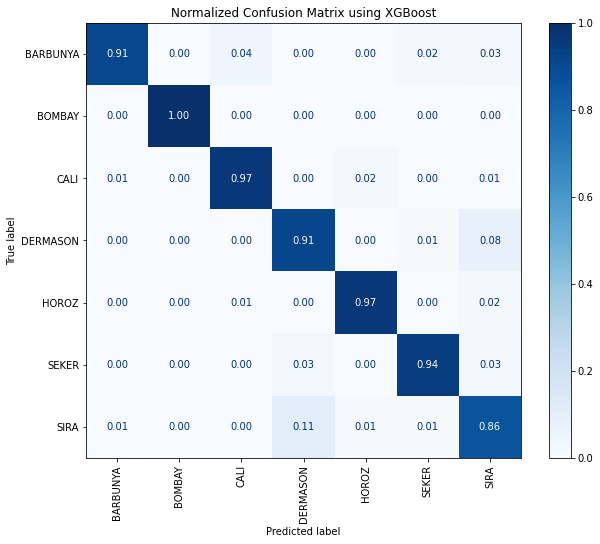

In [47]:
# Compute confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize='true')  # You can change 'normalize' to None if you want the non-normalized matrix

# Display confusion matrix for XGBoost
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,
                                  display_labels=decoded_y_test_labels_xgb)
fig, ax = plt.subplots(figsize=(10, 8))
disp_xgb.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='.2f')
plt.title("Normalized Confusion Matrix using XGBoost")
plt.show()


In [48]:
mse = mean_squared_error(y_test, y_pred_xgb)
r_squared = r2_score(y_test, y_pred_xgb)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.6645848640705364
r_square_value : 0.7960979709046208


In [49]:
# Calculate F1 scores
macro_f1 = f1_score(y_test, y_pred_xgb, average='macro')
micro_f1 = f1_score(y_test, y_pred_xgb, average='micro')

print('Macro F1 Score for XG Boost:', macro_f1)
print('Micro F1 Score XG Boost:', micro_f1)

Macro F1 Score for XG Boost: 0.9394427221473929
Micro F1 Score XG Boost: 0.9246877296105804


# Model training using MLP Classifier

In [50]:
model_mlp= MLPClassifier(random_state=1, max_iter=500, alpha=0.005)

model_mlp.fit(X_train_scaled, y_train)

# Make predictions using the XGBoost classifier
y_pred_mlp = model_mlp.predict(X_test_scaled)


In [51]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_mlp)
print('Accuracy: %.5f' % accuracy)

# Decode labels
y_test_labels = y_test.unique()
decoded_y_test_labels_mlp = labelencoder.inverse_transform(y_test_labels)

# Print the classification report
print(classification_report(y_test, y_pred_mlp, target_names=np.unique(decoded_y_test_labels_mlp)))

Accuracy: 0.93902
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.93      0.95       254
      BOMBAY       1.00      1.00      1.00       108
        CALI       0.97      0.97      0.97       314
    DERMASON       0.92      0.94      0.93       731
       HOROZ       0.97      0.97      0.97       406
       SEKER       0.96      0.95      0.96       396
        SIRA       0.88      0.87      0.88       513

    accuracy                           0.94      2722
   macro avg       0.95      0.95      0.95      2722
weighted avg       0.94      0.94      0.94      2722



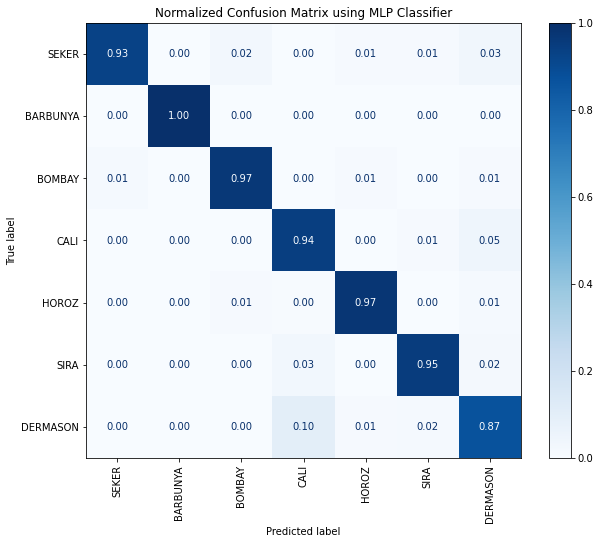

In [52]:
# Compute confusion matrix for XGBoost
cm_mlp = confusion_matrix(y_test, y_pred_mlp, normalize='true')  # You can change 'normalize' to None if you want the non-normalized matrix

# Display confusion matrix for XGBoost
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp,
                                  display_labels=decoded_y_test_labels_mlp)
fig, ax = plt.subplots(figsize=(10, 8))
disp_mlp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='.2f')
plt.title("Normalized Confusion Matrix using MLP Classifier")
plt.show()


In [53]:
mse = mean_squared_error(y_test, y_pred_mlp)
r_squared = r2_score(y_test, y_pred_mlp)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.5385745775165319
r_square_value : 0.8347593285495711


In [54]:
# Calculate F1 scores
macro_f1 = f1_score(y_test, y_pred_mlp, average='macro')
micro_f1 = f1_score(y_test, y_pred_mlp, average='micro')

print('Macro F1 Score for MLP :', macro_f1)
print('Micro F1 Score MLP:', micro_f1)

Macro F1 Score for XG Boost: 0.9504507769303032
Micro F1 Score XG Boost: 0.9390154298310066


Summary: 

Random Forest Classification model achieved an accuracy of 91%.
Despite applying RandomizedSearchCV, there was no significant improvement in results.
Support Vector Machine model outperformed both with an accuracy of 92.9%.
Decision Tree classifier achieved an accuracy of 89%.
XG Boost Classifier achieved an accuracy of 92.47%
MLP Classifier achieved an accuracy of 93.9%
The choice of classification algorithm significantly impacts model performance.
MLP Classifier demonstrated superior accuracy in this scenario.